In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})

In [19]:
def read_ods(filename, columns):
  key_arr = (k for k in columns.keys())
  df = pd.read_excel(filename, engine="odf", header=0,
                     usecols=columns)
  df = df.rename(columns=columns)
  return df


In [20]:
def get_accuracy_measures(dataframe):
  Y_t = dataframe["Y_t"]
  hat_Y_t = dataframe["hat_Y_t"]

  MAPE = (((Y_t - hat_Y_t).abs())/Y_t).mean()
  MAD = (Y_t - hat_Y_t).abs().mean()
  MSE = ((Y_t - hat_Y_t)**2).mean()
  MPE = ((Y_t - hat_Y_t)/Y_t).mean()
  
  return MAPE, MAD, MSE, MPE

In [21]:
namaFile = "table-1.ods"
df = read_ods(namaFile, {"t":"t","Price":"Y_t"})
df.head()

,t,Y_t
0,1,19.00
1,2,19.39
2,3,18.96
3,4,18.20
4,5,17.89


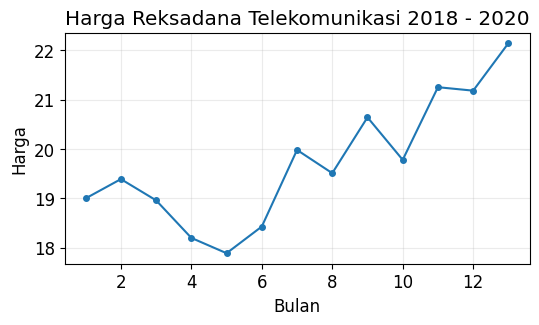

In [22]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df["t"], df["Y_t"], marker='o', markersize=4)
ax.set_xlabel("Bulan")
ax.set_ylabel("Harga")
ax.set_title("Harga Reksadana Telekomunikasi 2018 - 2020")
ax.grid("on")
plt.show(fig)

In [23]:
df_forecast = df.copy()
df_forecast["hat_Y_t"] = df_forecast["Y_t"].shift(1)
df_forecast["e_t"] = df_forecast["Y_t"] - df_forecast["hat_Y_t"]
df_forecast

,t,Y_t,hat_Y_t,e_t
0,1,19.00,NaN,NaN
1,2,19.39,19.00,0.39
2,3,18.96,19.39,-0.43
3,4,18.20,18.96,-0.76
4,5,17.89,18.20,-0.31
5,6,18.43,17.89,0.54
6,7,19.98,18.43,1.55
7,8,19.51,19.98,-0.47
8,9,20.64,19.51,1.13
9,10,19.78,20.64,-0.86


In [24]:
df_forecast.to_excel('no-1-a.xlsx')

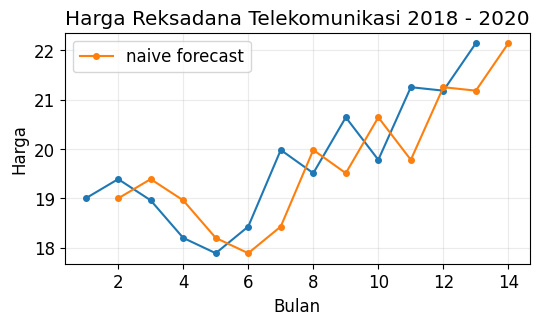

In [25]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df_forecast["t"], df_forecast["Y_t"], 
  marker='o', markersize=4)
ax.plot(df_forecast["t"], df_forecast["hat_Y_t"], 
  marker='o', markersize=4, label='naive forecast')

ax.set_xlabel("Bulan")
ax.set_ylabel("Harga")
ax.set_title("Harga Reksadana Telekomunikasi 2018 - 2020")
ax.grid("on")
ax.legend(loc="best")
plt.show(fig)

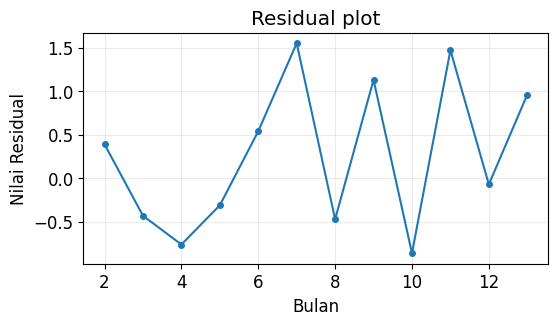

In [26]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df_forecast["t"], df_forecast["e_t"], 
  marker='o', markersize=4)

ax.set_xlabel("Bulan")
ax.set_ylabel("Nilai Residual")
ax.set_title("Residual plot")
ax.grid("on")
plt.show(fig)


In [27]:
MAPE, MAD, MSE, MPE = get_accuracy_measures(df_forecast)

print(f"MAD    {MAD:8.3f}")
print(f"MSE    {MSE:8.3f}")
print(f"MAPE   {MAPE*100:>9.2f}%")
print(f"MPE   {MPE*100:>9.2f}%")

MAD       0.745
MSE       0.752
MAPE        3.72%
MPE        1.18%
